In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
df= pd.read_csv("/content/drive/MyDrive/CC.csv")     # reading cc data set

df.head()                      # results top most rows in a data set

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# QUESTION 1 PCA Principal Component Analysis
**a. Apply PCA on CC dataset.**

In [81]:
df.shape   

(8950, 18)

In [82]:
df.isnull().sum()    #checking if any null values are present

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [83]:
#Dealing with Null values by replacing them with mean values.
mean1=df['CREDIT_LIMIT'].mean() 
mean2=df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)   # replacing null values with mean of a column
df['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)

In [84]:
df.isnull().sum() #checking if any null values are present after dealing with them.

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [85]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [86]:
X = df.drop(['TENURE','CUST_ID'],axis=1).values   # preprocessing the data by removing the columns(feature selection)
y = df['TENURE'].values #Target variable

In [87]:
# performing PCA 
pca1 = PCA(n_components=2)
principalComponents = pca1.fit_transform(X)   # pca is applied on the data set without output labels
# creating a data frame for the pca results
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# adding a new column to the data frame
finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf   # printing the results

,principal component 1,principal component 2,TENURE
0,-4326.383979,921.566882,12
1,4118.916665,-2432.846346,12
2,1497.907641,-1997.578694,12
3,1394.548536,-1488.743453,12
4,-3743.351896,757.342657,12
...,...,...,...
8945,-4208.357725,1122.443291,6
8946,-4123.923788,951.683820,6
8947,-4379.443989,911.504583,6
8948,-4791.117531,1032.540961,6


**b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?**

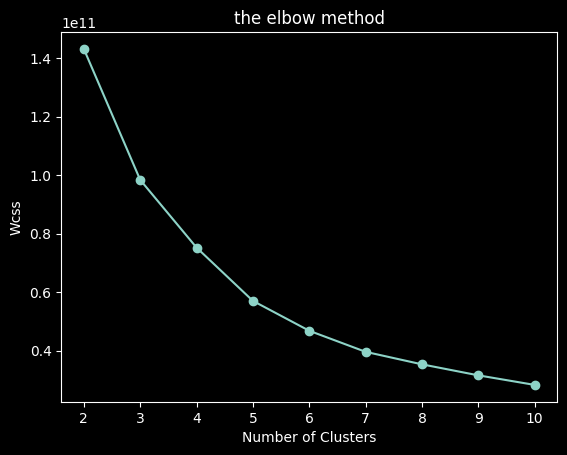

In [78]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)
    
plt.style.use('dark_background')
plt.plot(range(2,11),wcss,marker='o')
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

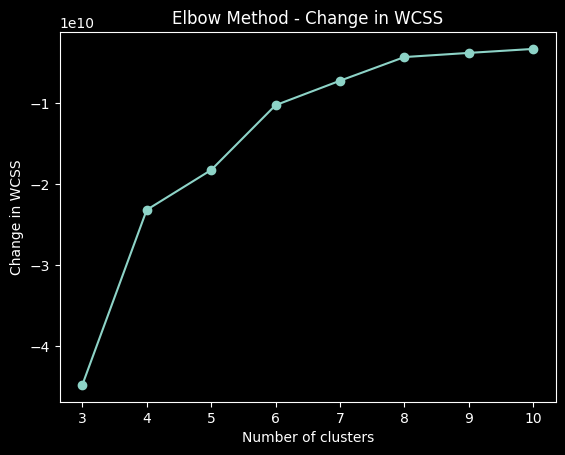

The optimal number of clusters is 2


In [88]:
# Identify the elbow point in the plot
import numpy as np
k_range = range(2, 11)
diff = np.diff(wcss)
plt.plot(k_range[1:], diff, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Change in WCSS')
plt.title('Elbow Method - Change in WCSS')
plt.show()

# The optimal number of clusters is where the elbow occurs
elbow_point = np.argmin(diff) + 2
print(f"The optimal number of clusters is {elbow_point}")


In [89]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters,random_state=42)
km.fit(finalDf)       # fitting out kmeans model with our data set

y_cluster_kmeans = km.predict(finalDf)
from sklearn import metrics
score = metrics.silhouette_score(finalDf, y_cluster_kmeans)  
print('silhouette score for the above cluster after applying PCA is', score)

silhouette score for the above cluster after applying PCA is 0.5720391530020281


**c. Perform Scaling+PCA+K-Means and report performance.**

In [90]:
scaler = StandardScaler()      # feature scaling using standard scaler
X_Scale = scaler.fit_transform(X)

In [91]:
# performing pca
pca2 = PCA(n_components=2)
principalComponents1 = pca2.fit_transform(X_Scale)

principalDf1 = pd.DataFrame(data = principalComponents1, columns = ['principal component 1', 'principal component 2'])

finalDf2 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
finalDf2

,principal component 1,principal component 2,TENURE
0,-1.718892,-1.072942,12
1,-1.169306,2.509319,12
2,0.938416,-0.382603,12
3,-0.907502,0.045857,12
4,-1.637829,-0.684978,12
...,...,...,...
8945,-0.025276,-2.034129,6
8946,-0.233112,-1.656653,6
8947,-0.593879,-1.828117,6
8948,-2.007672,-0.673766,6


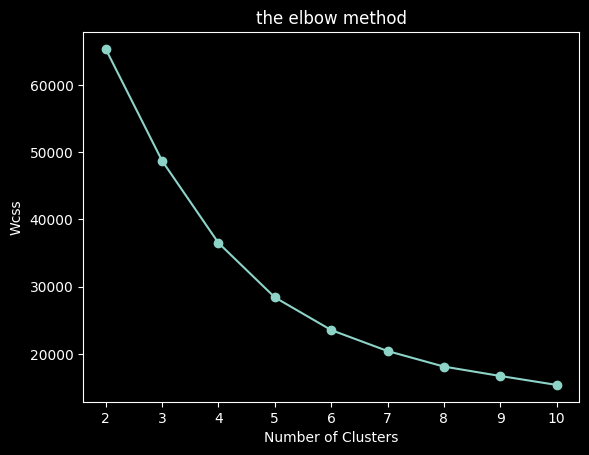

In [92]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finalDf2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11),wcss,marker='o')
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

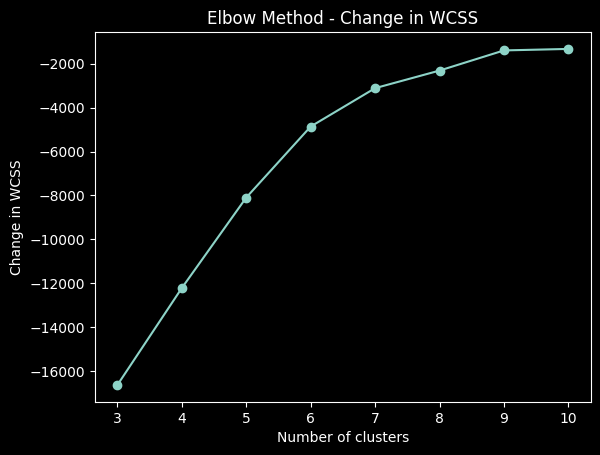

The optimal number of clusters is 3


In [93]:
# Identify the elbow point in the plot
k_range = range(2, 11)
diff = np.diff(wcss)
plt.plot(k_range[1:], diff, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Change in WCSS')
plt.title('Elbow Method - Change in WCSS')
plt.show()

# The optimal number of clusters is where the elbow occurs
elbow_point = np.argmin(diff) + 3
print(f"The optimal number of clusters is {elbow_point}")

In [94]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters,random_state=42)
km.fit(finalDf2)

y_cluster_kmeans = km.predict(finalDf2)
from sklearn import metrics
score = metrics.silhouette_score(finalDf2, y_cluster_kmeans)
print('silhouette score for the above cluster after applying K-Means is',score)

silhouette score for the above cluster after applying K-Means is 0.38375984139818387


#QUESTOIN 2. Use pd_speech_features.csv
**a. Perform Scaling**

In [95]:
df1= pd.read_csv("/content/drive/MyDrive/pd_speech_features.csv")    # reading pd_speech_features csv file
df1.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [96]:
X = df1.drop('class',axis=1).values   # preprocessing the data by removing the columns(feature selection)
y = df1['class'].values

In [97]:
scaler = StandardScaler()    #performing feature selection
X_Scale = scaler.fit_transform(X)

**b. Apply PCA (k=3)**

In [98]:
# performing pca
pca3 = PCA(n_components=3)
principalComponents2 = pca3.fit_transform(X_Scale)

principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2', 
                                                                    'principal components 3'])
finalDf3 = pd.concat([principalDf2, df1[['class']]], axis = 1)
finalDf3

,principal component 1,principal component 2,principal components 3,class
0,-10.047372,1.471077,-6.846403,1
1,-10.637725,1.583750,-6.830977,1
2,-13.516185,-1.253542,-6.818697,1
3,-9.155084,8.833603,15.290902,1
4,-6.764470,4.611469,15.637119,1
...,...,...,...,...
751,22.322682,6.481914,1.458753,0
752,13.442876,1.449415,9.352289,0
753,8.270264,2.391284,-0.908666,0
754,4.011760,5.412256,-0.847130,0


**c. Use SVM to report performance**

In [99]:
# splitting our data into training and testing part
X_train, X_test, y_train, y_true = train_test_split(finalDf3[::-1], finalDf3['class'], test_size = 0.30, random_state = 0)

In [100]:
# training and predcting svm model on our data set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.75      1.00      0.86       170

    accuracy                           0.75       227
   macro avg       0.37      0.50      0.43       227
weighted avg       0.56      0.75      0.64       227

[[  0  57]
 [  0 170]]
accuracy is 0.748898678414097


# QUESTION 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.

In [101]:
#3) Applying Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2. 

In [102]:
df2= pd.read_csv("/content/drive/MyDrive/Iris.csv")  # reading iris csv file
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
df2.isnull().any()   # checking null values

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [104]:
X = df2.iloc[:, 1:5].values   # preprocessing the data by removing the columns(feature selection)
y = df2.iloc[:, 5].values

In [105]:
# performing lda on the data set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
LinearDataSet = lda.fit_transform(X, y)
LinearDf = pd.DataFrame(data = LinearDataSet, columns = ['LinearDataSetCol 1', 'LinearDataSetCol 2'])   # converting our results into a dataset
finalLda = pd.concat([LinearDf, df2[['Species']]], axis = 1)   # appending species column to the data frame
finalLda   

,LinearDataSetCol 1,LinearDataSetCol 2,Species
0,8.084953,0.328454,Iris-setosa
1,7.147163,-0.755473,Iris-setosa
2,7.511378,-0.238078,Iris-setosa
3,6.837676,-0.642885,Iris-setosa
4,8.157814,0.540639,Iris-setosa
...,...,...,...
145,-5.674013,1.661346,Iris-virginica
146,-5.197129,-0.365506,Iris-virginica
147,-4.981712,0.812973,Iris-virginica
148,-5.901486,2.320751,Iris-virginica


#QUESTION 4. Briefly identify the difference between PCA and LDA

PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both linear transformation techniques that are frequently used for dimensionality reduction.

But they differ in their Aims and application procedures.
***
***Aim:***
***PCA*** aims to find the directions of maximum variance in the data, and projects the data onto a new coordinate system that captures most of the original variability in fewer dimensions. It does not take into account the class labels or any other external information about the data.

***LDA***, aims to find a projection that maximizes the separation between different classes. It takes into account of the class labels of the data and tries to find the direction that best separates the classes.

***

***Applications***:
***PCA*** is often used for exploratory data analysis and feature extraction, especially when the goal is to visualize the data or reduce its complexity. It can be used as a pre-processing step before other machine learning algorithms to reduce the number of input features.

LDA is mostly used for classification and pattern recognition problems, where the goal is to predict the class label of a new observation based on its features. It can be used as a standalone classifier or as a pre-processing step before other classification algorithms to improve their performance.

Assumptions:
PCA assumes that the principal components are orthogonal and uncorrelated, and that the data is normally distributed.

LDA assumes that the data is normally distributed and that the classes have equal covariance matrices. It also assumes that the observations within each class are independent of each other.

***

In summary, while both PCA and LDA are linear transformation techniques for dimensionality reduction, they differ in their objectives, applications, and assumptions. 
PCA aims to capture the most variance in the data, while LDA aims to maximize the separation between classes. PCA is often used for exploratory data analysis and feature extraction, while LDA is often used for classification and pattern recognition problems.

***


